In [67]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
yelp = pd.read_csv('C://Users//User//Documents//AAIC//Foundation_of_NLP_ML//Yelp_NLP//yelp.csv')

In [6]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [8]:
yelp.describe().loc['mean',:]

stars     3.7775
cool      0.8768
useful    1.4093
funny     0.7013
Name: mean, dtype: float64

In [10]:
yelp.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 11.2 MB


In [11]:
yelp.memory_usage(deep=True)

Index              128
business_id     790000
date            670000
review_id       790000
stars            80000
text           7715089
type            630000
user_id         790000
cool             80000
useful           80000
funny            80000
dtype: int64

In [12]:
yelp.shape

(10000, 10)

In [13]:
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

<AxesSubplot:>

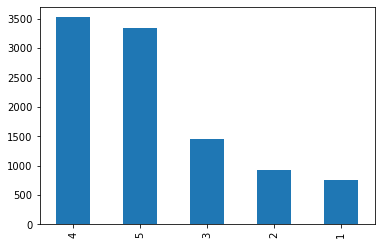

In [16]:
yelp.stars.value_counts().plot(kind='bar')

In [19]:
yelp.stars.value_counts().sort_values(ascending=True)

1     749
2     927
3    1461
5    3337
4    3526
Name: stars, dtype: int64

In [20]:
df = yelp[yelp['stars'].isin([1,5])]

In [21]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [22]:
df.drop(['business_id','date','review_id','type','user_id','cool','useful', 'funny'],axis=1,inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
df.columns

Index(['stars', 'text'], dtype='object')

In [25]:
X = df['text']
y = df['stars']

In [26]:
X.shape

(4086,)

In [27]:
y.shape

(4086,)

In [28]:
X.head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object

In [29]:
y.head()

0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4)

In [33]:
X_train.head()

2456    I want to preface this review by saying that I...
6571    After four years of living in AZ I finally fou...
3828    MARGARITA time....I love their ritas on the ro...
3315    I've been meaning to try this place for months...
9544    T&S Glass did a wonderful job replacing my car...
Name: text, dtype: object

In [36]:
X_test.head()

1227    This place was messy and loud.  The food reall...
8387    I can't believe I haven't wrote a review for T...
200     Who dosen't like Cosco, I love this place. The...
9495    I really love this gym. It is so nice and well...
8374    We made a last minute decision to go out on Ne...
Name: text, dtype: object

In [37]:
y_train.head()

2456    5
6571    5
3828    5
3315    5
9544    5
Name: stars, dtype: int64

In [38]:
y_test.head()

1227    1
8387    5
200     5
9495    5
8374    5
Name: stars, dtype: int64

In [47]:
stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

In [48]:
count_vect = CountVectorizer(min_df=5,stop_words=stopwords)

In [49]:
count_vect.fit(X_train,y_train)

CountVectorizer(min_df=5,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', 'your', 'yours', 'yourself',
                            'yourselves', 'he', 'him', 'his', 'himself', 'she',
                            'her', 'hers', 'herself', 'it', 'its', 'itself',
                            'they', 'them', 'their', 'theirs', 'themselves',
                            'what', ...])

In [50]:
dtm = count_vect.transform(X_train)

In [51]:
dtm

<3064x4228 sparse matrix of type '<class 'numpy.int64'>'
	with 144528 stored elements in Compressed Sparse Row format>

In [52]:
X_train.shape

(3064,)

In [53]:
dtm_test = count_vect.transform(X_test)

In [54]:
dtm_test

<1022x4228 sparse matrix of type '<class 'numpy.int64'>'
	with 46074 stored elements in Compressed Sparse Row format>

In [55]:
X_test.shape

(1022,)

In [58]:
X_tr,X_cv,y_tr,y_cv = train_test_split(X_train,y_train,test_size=0.4,random_state=4)

In [66]:
y_cv.shape

(1226,)

In [69]:
vect = CountVectorizer(min_df=5,stop_words=stopwords)
vect.fit(X_tr,y_tr)
dtm_tr = vect.transform(X_tr)
dtm_cv= vect.transform(X_cv)

In [70]:
dtm_tr.shape

(1838, 3028)

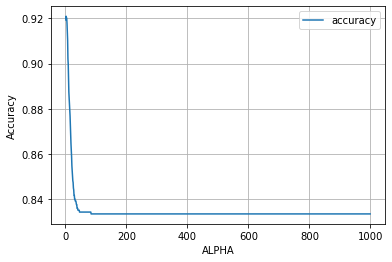

In [90]:
acc = list()
acc_dict = dict()
for i in range(1,1000):
    clf = MultinomialNB(alpha=i)
    clf.fit(dtm_tr,y_tr)
    y_pred = clf.predict(dtm_cv)
    acc.append(accuracy_score(y_cv,y_pred))
    acc_dict[i] = accuracy_score(y_cv,y_pred)

alpha = np.array(range(1,1000))
acc = np.array(acc)
 
plt.plot(alpha,acc,label='accuracy')
plt.xlabel('ALPHA')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [86]:
acc = list()
acc_dict = dict()
for i in range(1,101):
    clf = MultinomialNB(alpha=i)
    clf.fit(dtm_tr,y_tr)
    y_pred = clf.predict(dtm_cv)
    acc.append(accuracy_score(y_cv,y_pred))
    acc_dict[i] = accuracy_score(y_cv,y_pred)

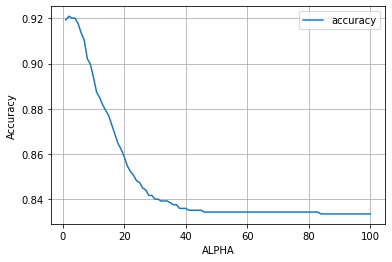

In [87]:
alpha = np.array(range(1,101))
acc = np.array(acc)
 
plt.plot(alpha,acc,label='accuracy')
plt.xlabel('ALPHA')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

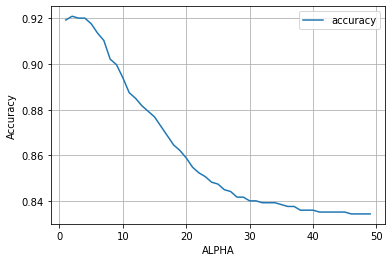

In [88]:
acc = list()
acc_dict = dict()
for i in range(1,50):
    clf = MultinomialNB(alpha=i)
    clf.fit(dtm_tr,y_tr)
    y_pred = clf.predict(dtm_cv)
    acc.append(accuracy_score(y_cv,y_pred))
    acc_dict[i] = accuracy_score(y_cv,y_pred)

alpha = np.array(range(1,50))
acc = np.array(acc)
 
plt.plot(alpha,acc,label='accuracy')
plt.xlabel('ALPHA')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

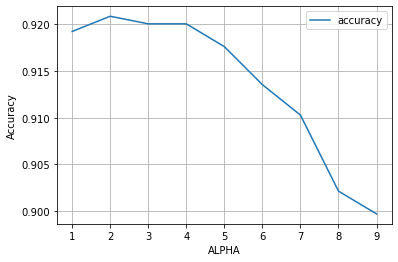

In [89]:
acc = list()
acc_dict = dict()
for i in range(1,10):
    clf = MultinomialNB(alpha=i)
    clf.fit(dtm_tr,y_tr)
    y_pred = clf.predict(dtm_cv)
    acc.append(accuracy_score(y_cv,y_pred))
    acc_dict[i] = accuracy_score(y_cv,y_pred)

alpha = np.array(range(1,10))
acc = np.array(acc)
 
plt.plot(alpha,acc,label='accuracy')
plt.xlabel('ALPHA')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [94]:
clf = MultinomialNB(alpha=2)
clf.fit(dtm,y_train)
print('class count from train ',clf.class_count_)
print('class log prior ',clf.class_log_prior_)
print('Empirical log probability of features given a class, P(x_i|y) ',clf.feature_log_prob_)
y_pred = clf.predict(dtm_test)
print('Accuracry seen fom the test data is ',accuracy_score(y_test,y_pred))


class count from train  [ 556. 2508.]
class log prior  [-1.70670824 -0.20023563]
Empirical log probability of features given a class, P(x_i|y)  [[ -7.23678391  -8.97138497  -9.66453215 ... -10.06999726 -10.06999726
  -10.06999726]
 [ -8.19765875  -9.66399582  -9.91531025 ...  -9.5586353   -9.78177885
   -9.37631374]]
Accuracry seen fom the test data is  0.9305283757338552


In [102]:
confusion_df = pd.DataFrame(confusion_matrix(y_test,y_pred),index=[1,5],columns=[1,5])

In [107]:
tn,fp,fn,tp = np.array(confusion_df).ravel()

In [109]:
confusion_df

,1,5
1,160,33
5,38,791


In [111]:
print('True negative ',tn)
print('True positive ',tp)
print('False negative ',fn)
print('False postive ',fp)

True negative  160
True positive  791
False negative  38
False postive  33


In [142]:
majority_class = pd.DataFrame(y_test.value_counts().sort_values(ascending=False)).index[0]
print(majority_class)

5


In [145]:
y_test_df = pd.DataFrame(y_test)

In [147]:
y_test_df.shape

(1022, 1)

In [159]:

y_test_df['y_pred'] =majority_class

In [160]:
y_test_df.head()

,stars,y_pred
1227,1,5
8387,5,5
200,5,5
9495,5,5
8374,5,5


In [161]:
actual = np.array(y_test_df['stars'])
pred = np.array(y_test_df['y_pred'])

In [162]:
print('Null accuracy value is ',accuracy_score(actual,pred))

Null accuracy value is  0.8111545988258317


In [163]:
print('True negative ',tn)
print('True positive ',tp)
print('False negative ',fn)
print('False postive ',fp)

True negative  160
True positive  791
False negative  38
False postive  33
